In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from utils_NN import getData, softmax, cost2, y2indicator, error_rate, relu

In [2]:
class ANN(object):
    def __init__(self, M):
        self.M = M
    
    def forward(self, X):
        Z = np.tanh(X.dot(self.W1) + self.b1)
        return softmax(Z.dot(self.W2) + self.b2), Z
    
    def predict(self, X):
        pY, _ = self.forward(X)
        return np.argmax(pY, axis=0)
    
    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)

    def fit(self, X, Y, Xval, Yval, learning_rate=1e-6, reg=0, epochs=10000, show_fig=False):
       
        N, D = X.shape
        K = len(set(Y))
        T = y2indicator(Y)

        self.W1 = np.random.randn(D, self.M) / np.sqrt(D + self.M)
        self.b1 = np.zeros(self.M)
        self.W2 = np.random.randn(self.M, K) / np.sqrt(self.M + K)
        self.b2 = np.zeros(K)

        costs = []
        best_validation_error = 1
        for i in range(epochs):
            pY, Z = self.forward(X)

            # gradient descent
            pY_T = pY - T
            self.W2 -= learning_rate * (Z.T.dot(pY_T) + reg*self.W2)
            self.b2 -= learning_rate * (pY_T.sum(axis=0) + reg*self.b2)

            dZ = pY_T.dot(self.W2.T) * (1 - Z*Z)  # relu derivative
            self.W1 -= learning_rate * (X.T.dot(dZ) + reg*self.W1)
            self.b1 -= learning_rate * (dZ.sum(axis=0) + reg*self.b1)

            if i % 10 == 0:
                pYval, _ = self.forward(Xval)
                c = cost2(Yval, pYval)
                costs.append(c)
                e = error_rate(Yval, np.argmax(pYval, axis=1))
                print(f"i: {i};  cost: {c:.0f}; error: {e:.3f}")
                if e < best_validation_error:
                    best_validation_error = e
        print(f"best validation error: {best_validation_error}")

        if show_fig:
            plt.plot(costs)
            plt.show()

        


i: 0;  cost: 2004; error: 0.747
i: 10;  cost: 1902; error: 0.751
i: 20;  cost: 1880; error: 0.744
i: 30;  cost: 1869; error: 0.736
i: 40;  cost: 1859; error: 0.738
i: 50;  cost: 1871; error: 0.752
i: 60;  cost: 1847; error: 0.741
i: 70;  cost: 1848; error: 0.746
i: 80;  cost: 1850; error: 0.746
i: 90;  cost: 1845; error: 0.742
i: 100;  cost: 1840; error: 0.742
i: 110;  cost: 1834; error: 0.738
i: 120;  cost: 1834; error: 0.735
i: 130;  cost: 1851; error: 0.744
i: 140;  cost: 1848; error: 0.733
i: 150;  cost: 1831; error: 0.737
i: 160;  cost: 1795; error: 0.717
i: 170;  cost: 1827; error: 0.733
i: 180;  cost: 1841; error: 0.740
i: 190;  cost: 1820; error: 0.735
i: 200;  cost: 1780; error: 0.712
i: 210;  cost: 1803; error: 0.715
i: 220;  cost: 1842; error: 0.738
i: 230;  cost: 1816; error: 0.722
i: 240;  cost: 1772; error: 0.705
i: 250;  cost: 1783; error: 0.707
i: 260;  cost: 1837; error: 0.731
i: 270;  cost: 1811; error: 0.708
i: 280;  cost: 1768; error: 0.701
i: 290;  cost: 1767; erro

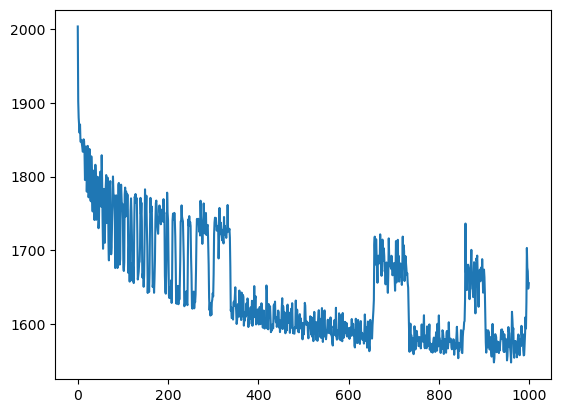

ValueError: operands could not be broadcast together with shapes (1000,) (7,) 

In [3]:
def main():
    Xtrain, Ytrain, Xval, Yval = getData()
    model = ANN(50) # type: ignore
    model.fit(Xtrain, Ytrain, Xval, Yval, reg=0, show_fig=True)
    sc = model.score(Xval, Yval) # type: ignore
    print(f"model score: {sc}")

if __name__ == '__main__':
    main()